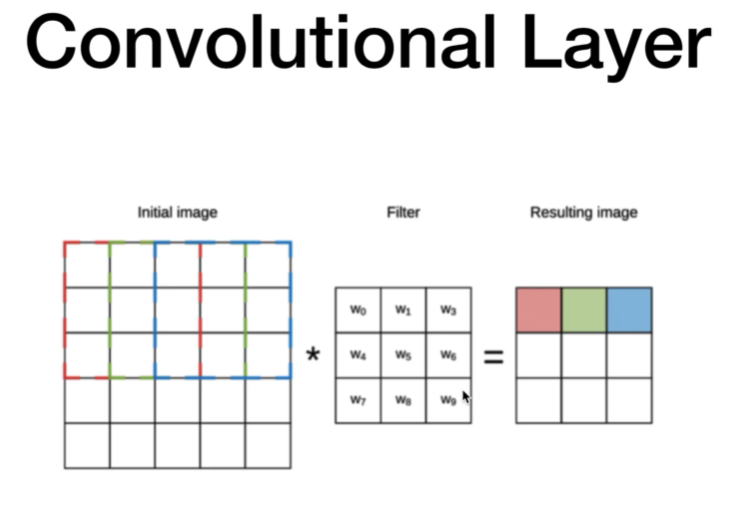

## <u> Convolutional layer </u>

### The convolutional layer serves to detect (multiple) patterns in multipe sub-regions in the input field using receptive fields.

## <u> Pooling layer </u>

### The pooling layer serves to progressively reduce the spatial size of the representation, to reduce the number of parameters and amount of computation in the network, and hence to also control overfitting.

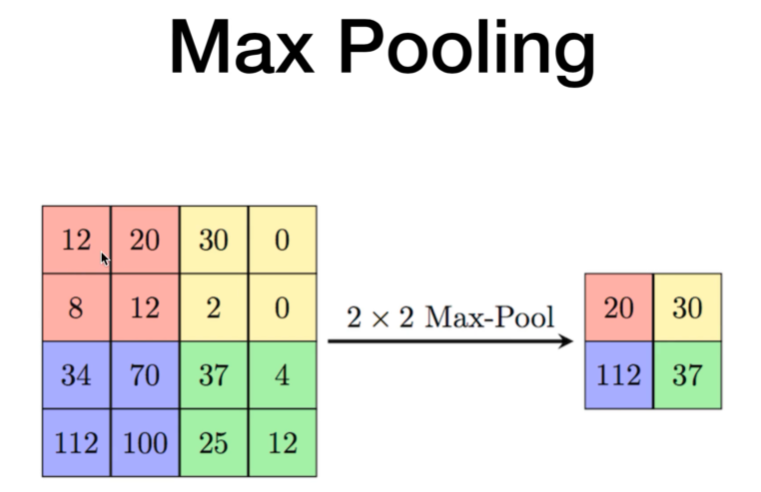

### A conv-layer has parameters to learn (that is your weights which you update each step), whereas the pooling layer does not - it is just applying some given function e.g max-function.

In [10]:
import numpy as np
import torch
import torch.nn as nn
import torchvision # for the datasets
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Device Configuration...

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
device

device(type='cuda')

### Defining Hyper-parameters

In [13]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

### MNIST Dataset, DataLoader and transformations

In [14]:
# dataset has PILImage images of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5 ))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train = True, transform=transform, download = True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train = False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle = False)

Files already downloaded and verified


In [15]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

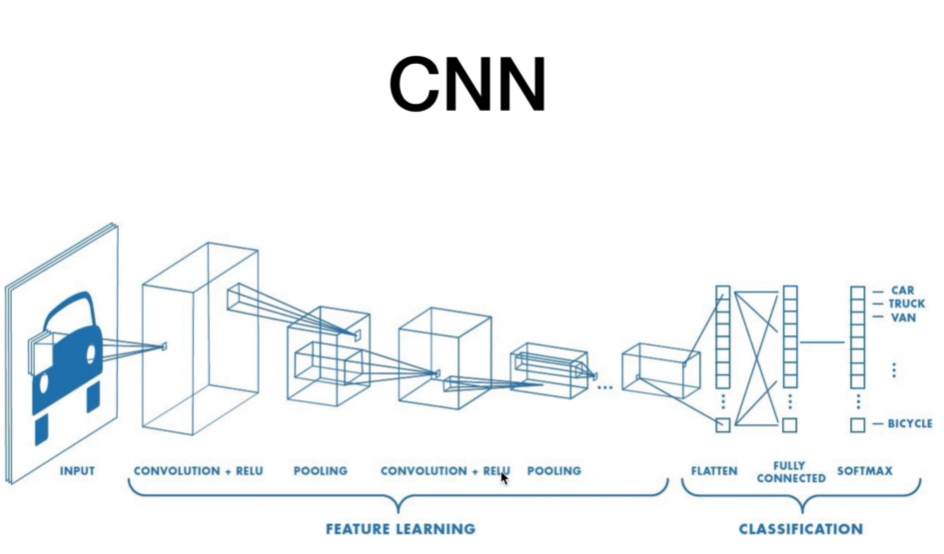

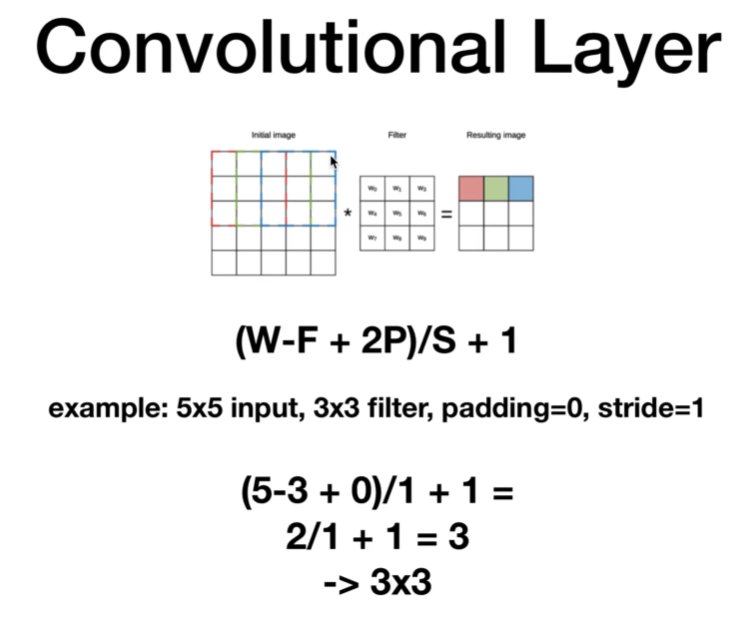

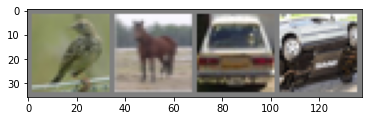

In [16]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

### CNN

In [17]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # The number of output channels corresponds to the number of convolution filters/kernels you want this layer to have
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 for the 3 color channels (input channel size) , 6 for the output channel size (number of channels produced by the convolution, kernel size 5 -> 5x5 kernel)
        self.pool = nn.MaxPool2d(2, 2) # kernel size of 2 and a stride of 2
        self.conv2 = nn.Conv2d(6, 16, 5) # the input channel size must be equal to the last channel size (6), output channel size 16, kernel size 5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # fully connected layer, first value is input size based of the output from conv2, the second is the output size.
        self.fc2 = nn.Linear(120, 84) # 120 input features, 84 output features
        self.fc3 = nn.Linear(84, 10) # input size 84, output size 10 because there are 10 classes.

    def forward(self, x):
        # -> n, 3, 32, 32
        # apply actiavtion function with torch.nn.functional as f....activation function does not change the size...
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5...............its because of this output size, 16 * 5 * 5 was determined in fc1...(code in line 8)
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400   .....flattening
        x = F.relu(self.fc1(x))               # -> n, 120   first fully connected layer with relu activation function
        x = F.relu(self.fc2(x))               # -> n, 84    2nd
        x = self.fc3(x)                       # -> n, 10    last fully connected layer, no activation function, no softmax because it will be set up with nn.CrossEntropyLoss
        return x
    
# - send the model to the device    
model = ConvNet().to(device)

### Training 

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/4], Step [2000/12500], Loss: 2.3179
Epoch [1/4], Step [4000/12500], Loss: 2.3004
Epoch [1/4], Step [6000/12500], Loss: 2.2266
Epoch [1/4], Step [8000/12500], Loss: 2.1442
Epoch [1/4], Step [10000/12500], Loss: 2.5561
Epoch [1/4], Step [12000/12500], Loss: 2.7318
Epoch [2/4], Step [2000/12500], Loss: 1.5506
Epoch [2/4], Step [4000/12500], Loss: 1.8700
Epoch [2/4], Step [6000/12500], Loss: 2.5354
Epoch [2/4], Step [8000/12500], Loss: 1.3813
Epoch [2/4], Step [10000/12500], Loss: 1.6977
Epoch [2/4], Step [12000/12500], Loss: 3.3446
Epoch [3/4], Step [2000/12500], Loss: 1.8165
Epoch [3/4], Step [4000/12500], Loss: 1.3045
Epoch [3/4], Step [6000/12500], Loss: 1.2522
Epoch [3/4], Step [8000/12500], Loss: 1.6669
Epoch [3/4], Step [10000/12500], Loss: 1.2746
Epoch [3/4], Step [12000/12500], Loss: 1.3331
Epoch [4/4], Step [2000/12500], Loss: 2.0106
Epoch [4/4], Step [4000/12500], Loss: 2.0628
Epoch [4/4], Step [6000/12500], Loss: 2.2772
Epoch [4/4], Step [8000/12500], Loss: 1.4886
Epoc

### Testing

In [19]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Finished Training
Accuracy of the network: 47.23 %
Accuracy of plane: 57.1 %
Accuracy of car: 56.7 %
Accuracy of bird: 22.2 %
Accuracy of cat: 11.2 %
Accuracy of deer: 35.9 %
Accuracy of dog: 60.3 %
Accuracy of frog: 58.2 %
Accuracy of horse: 53.8 %
Accuracy of ship: 56.6 %
Accuracy of truck: 60.3 %


---